# Fun with Word Clouds
## This program generates various Word Clouds based on data extracted from NYC Jobs Postings (updated on April 16, 2019)

The dataset was found through New York City's Open Data platform: https://data.cityofnewyork.us/City-Government/NYC-Jobs/kpav-sd4t

### Assumptions  
* Though some postings list many spots open for a particular role, I am treating each posting as a count of one since each candidate can typically only apply to a company once.

In [90]:
'''
Import necessary libraries
'''
import re

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from PIL import Image
!conda install -c conda-forge wordcloud==1.4.1 --yes
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [91]:
'''
Extract data into a DataFrame
'''

job_postings = pd.read_csv('NYC_Jobs.csv')
print(job_postings.columns)

rel_cols = ['Job Description','Minimum Qual Requirements','Preferred Skills']
job_postings = job_postings[rel_cols]
job_postings.shape

Index(['Job ID', 'Agency', 'Posting Type', 'Business Title',
       'Civil Service Title', 'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')


(3494, 4)

There are almost 3,500 job postings.

In [120]:
'''
Function to instantiate and plot a Word Cloud
'''
def generateWordCloud(text, max_words, max_font_size, figure_size, more_stopwords={}, mask=None,
                      title=None, title_size=20, title_color='green', image_color=False):
    stopwords = set(STOPWORDS).union(more_stopwords)
    
    # instantiate a Word Cloud
    wc = WordCloud(background_color='white', max_words=max_words, max_font_size=max_font_size, mask=mask, random_state = 0, stopwords = stopwords)
    
    wc.generate(text)
    
    # plot
    plt.figure(figsize=figure_size)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, {'size': title_size, 'color': title_color})
    
    plt.show()

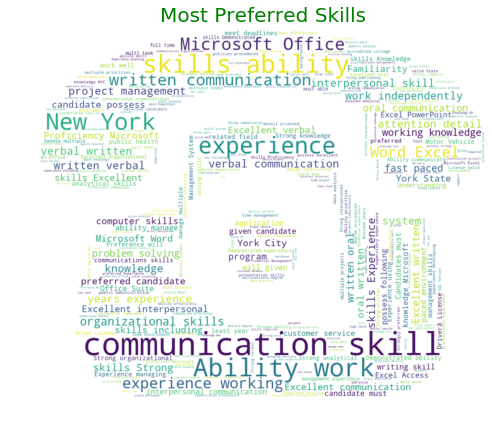

In [142]:
'''
Cleanse text and generate Word Cloud for Preferred Skills
'''
# get text
job_postings['Preferred Skills'].replace("\t","",regex=True, inplace=True)
skills = ' '.join(job_postings['Preferred Skills'].dropna().tolist())

# get mask
skills_mask = np.array(Image.open('skills.jpg'))

generateWordCloud(text=skills, max_words=300, max_font_size=100, mask=skills_mask,
                  figure_size=(8,10), title="Most Preferred Skills")

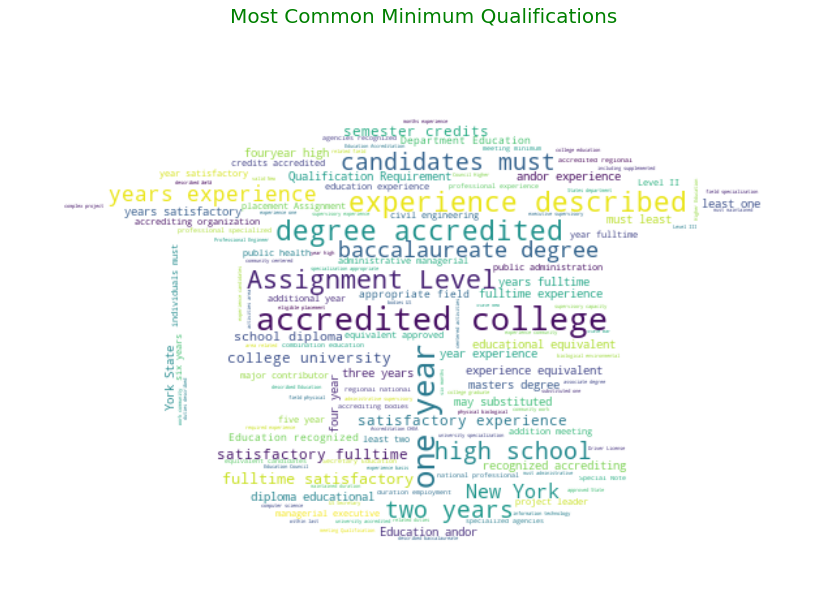

In [139]:
'''
Cleanse text and generate Word Cloud for Minimum Qualifications
'''
# get text
job_postings['Minimum Qual Requirements'].replace("\t","",regex=True, inplace=True)
qualifications = ' '.join(job_postings['Minimum Qual Requirements'].dropna().tolist())
qualifications = re.sub(r'[^\w\s]','',qualifications)

# get mask
qual_mask = np.array(Image.open('qualifications.jpg'))

generateWordCloud(text=qualifications, max_words=200, max_font_size=25, figure_size=(14,18), 
                  mask=qual_mask, title="Most Common Minimum Qualifications")

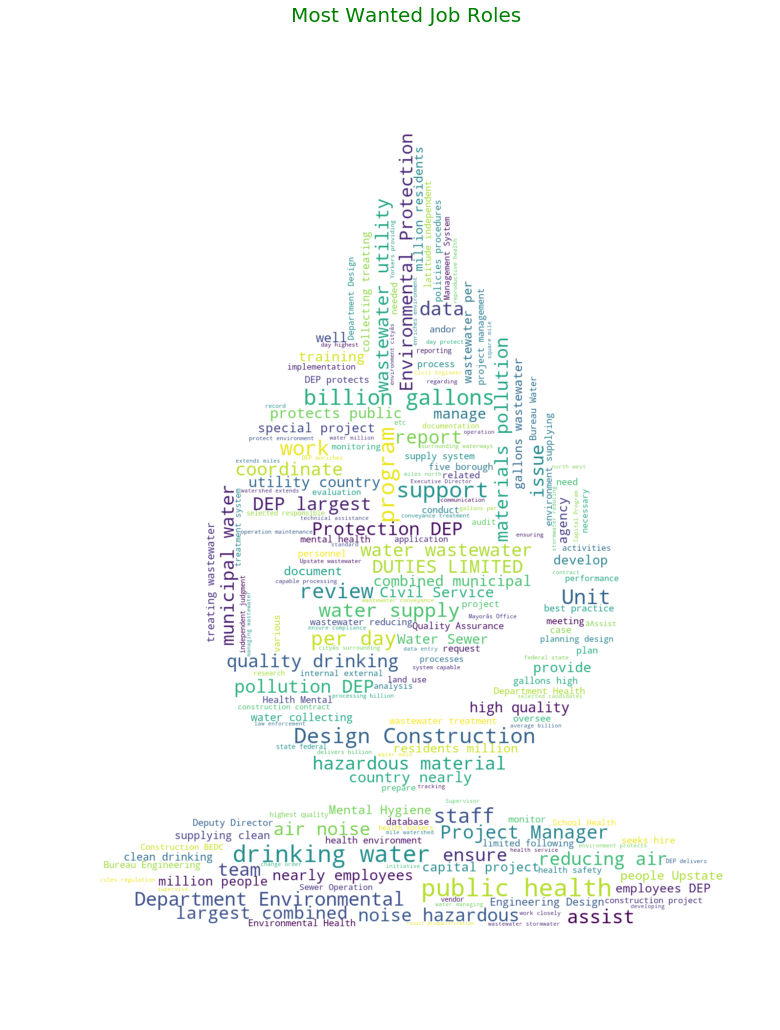

In [227]:
'''
Cleanse text and generate Word Cloud for Job Descriptions
'''
more_stopwords = {'New','York','City','NYC','candidate','will','including','include','responsibilities'}

# get text
job_postings['Job Description'].replace("\t","",regex=True, inplace=True)
jobs = ' '.join(job_postings['Job Description'].dropna().tolist())
jobs = re.sub(r'[^\w\s]','',jobs) # strip out punctuation

# get mask
job_mask = np.array(Image.open('water.jpg'))

generateWordCloud(text=jobs, max_words=200, max_font_size=50, figure_size=(14,18), 
                  more_stopwords=more_stopwords,mask=job_mask, title="Most Wanted Job Roles")